### **1. Problem statement**

This project understands how the Price of the Diamond is affected by other variables such as Cut, Carat, Clarity and Depth.

### **2. Import Libraries/Dataset**


**a) Importing the Required Libraries**

In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,precision_recall_fscore_support,mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC

Matplotlib is building the font cache; this may take a moment.


**b) Download the Dataset**

In [4]:
data = pd.read_csv('data/diamond.csv', index_col=[0])

### **3. Data Visualization and Exploration**

**a) Print at least 5 rows for sanity check to identify all the features present in the dataset and
if the target matches with them.**

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


**b) Print the description and shape of the dataset.**

In [7]:
data.shape

(53940, 10)

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


**c) Provide appropriate visualization to get an insight about the dataset.**

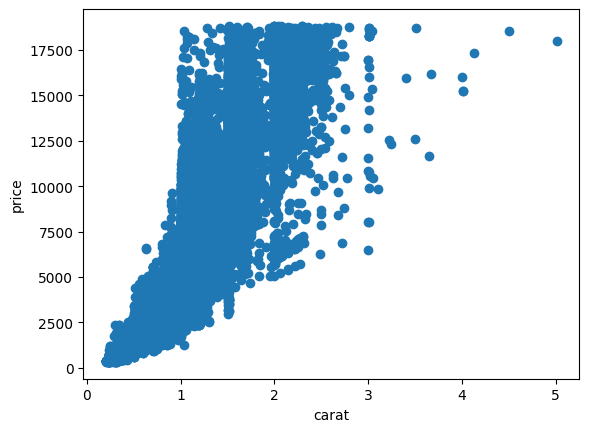

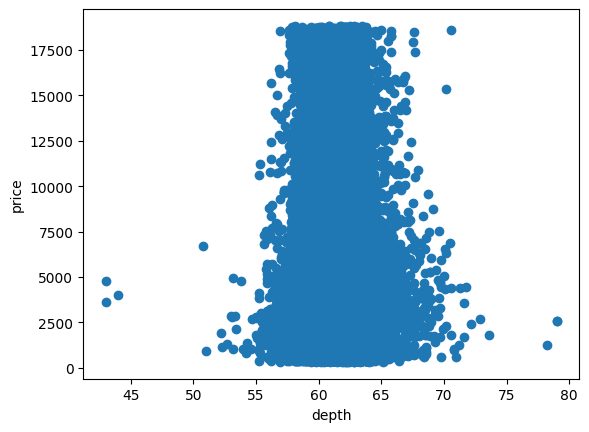

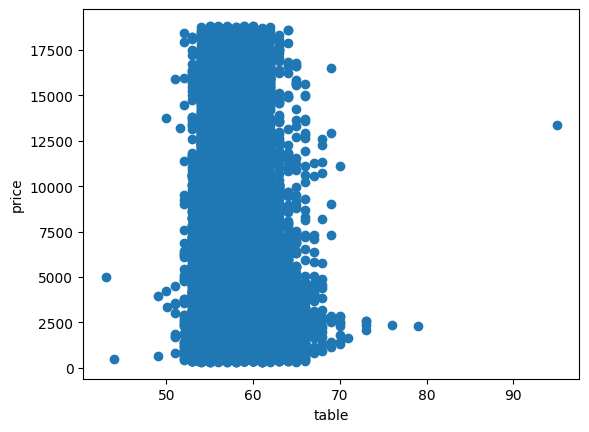

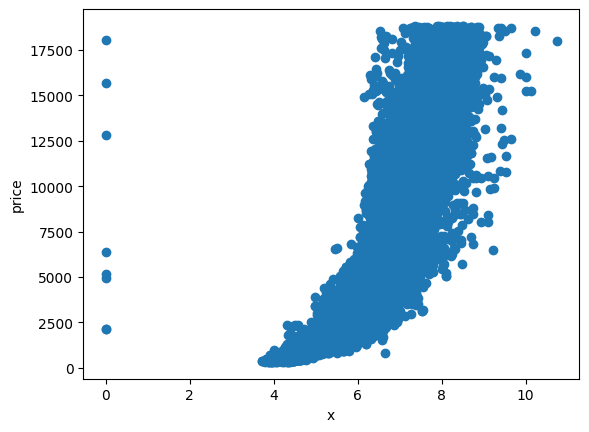

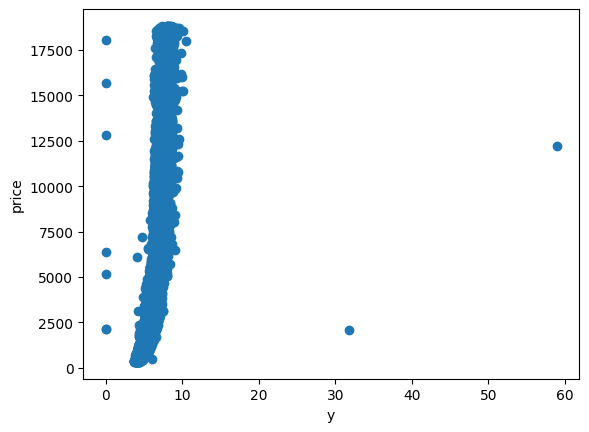

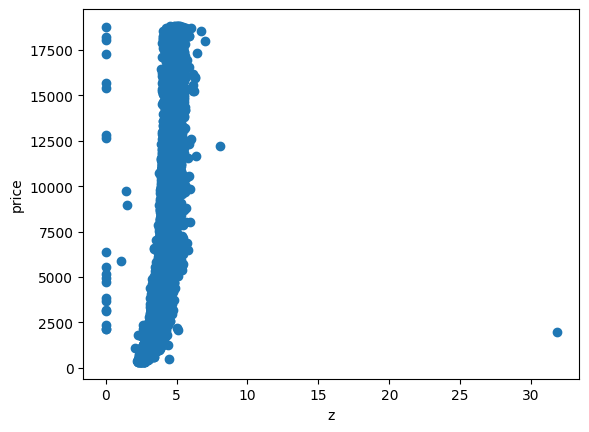

In [10]:
numeric_vars = data.select_dtypes(include=['float64']).columns
# creating a subplot for each numeric column
for variable in numeric_vars:
    fig = plt.scatter(x=variable, y='price', data=data)
    plt.xlabel(variable)
    plt.ylabel("price")
    plt.show()

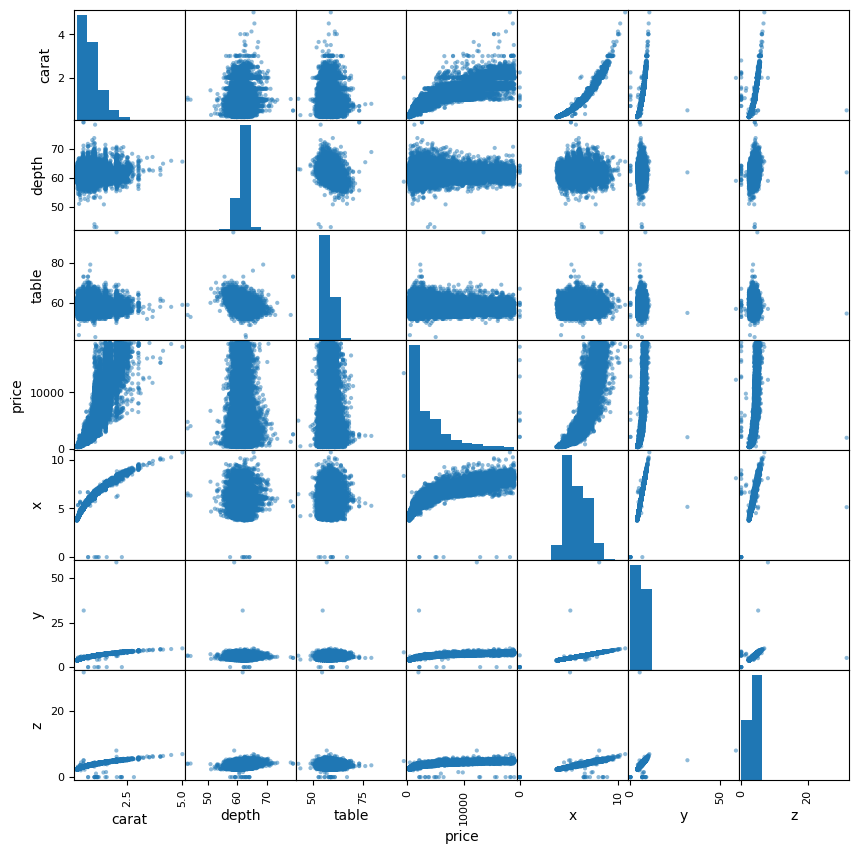

In [10]:
# Create the pair plot
pd.plotting.scatter_matrix(data, figsize=(10,10))
plt.show()


**d) Try exploring the data and see what insights can be drawn from the dataset.**

1) From the above Plots we can infer the following

*   Increase in Carat leads to increase in Price
*   Increase in X leads to increase in Price
*   Increase in Y leads to increase in Price
*   Increase in Z leads to increase in Price

2) X, Y, Z contains some outliers which needs to be removed.


### **4. Data Pre-processing and cleaning**

**a) Do the appropriate preprocessing of the data like identifying NULL or Missing Values if
any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate
feature engineering techniques for them.**

In [11]:
#Code to check and drop duplicates if any
duplicates_exist = data.duplicated()
print(data[duplicates_exist])

# Dropping duplicates from the data
data.drop_duplicates(inplace=True)

       carat    cut color clarity  depth  table  price     x     y     z
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1009    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2026    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47970   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49327   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49558   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50080   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52862   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]


In [12]:
# Shape of the dataset after dropping duplicates
data.shape

(53794, 10)

In [13]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
# Dropping dimensionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [16]:
# Shape of the dataset after dropping dimensionless diamonds
data.shape

(53775, 10)

<Axes: title={'center': 'Boxplot of Diamond Dataset'}>

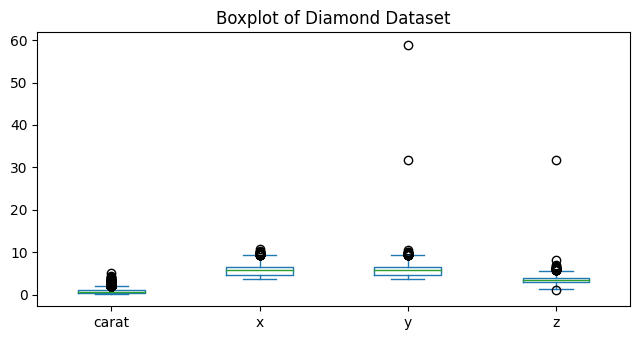

In [17]:
plt.rcParams["figure.figsize"] = [6.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
data[['carat', 'x', 'y', 'z']].plot(kind='box', title='Boxplot of Diamond Dataset')

In [18]:
# Shape before dropping the outliers
data.shape

(53775, 10)

In [19]:
#Code to remove outliers.
def remove_outliers(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.25,0.75]).values # [Q1, Q3]
            IQR = percentiles[1] - percentiles[0] # Inter Quartile Range = Q3 - Q1
            print(percentiles[1], percentiles[0], IQR)
            df = df.drop(df[df[col] > (percentiles[1] + 3*IQR)].index)
            df = df.drop(df[df[col] < (percentiles[0] - 3*IQR)].index)
        else:
            df[col]=df[col]
    return df

data = remove_outliers(data)

capping the  carat
1.04 0.4 0.64
capping the  cut
capping the  color
capping the  clarity
capping the  depth
62.5 61.0 1.5
capping the  table
59.0 56.0 3.0
capping the  price
5317.0 946.0 4371.0
capping the  x
6.53 4.71 1.8200000000000003
capping the  y
6.53 4.72 1.8100000000000005
capping the  z
4.03 2.91 1.12


In [20]:
# Shape of the dataset after dropping outliers
data.shape

(53319, 10)

**b) Apply the feature transformation techniques like Standardization, Normalization, etc. You
are free to apply the appropriate transformations depending upon the structure and the
complexity of your dataset.**

In [21]:
data['cut'] = data['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})

data['color'] = data['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})

data['clarity'] = data['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

**c) Do the correlational analysis on the dataset. Provide a visualization for the same.**

In [22]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.127564,-0.288772,-0.349080,0.017440,0.184239,0.924789,0.979504,0.978710,0.978005
cut,-0.127564,1.000000,0.016814,0.181564,-0.220352,-0.430538,-0.052615,-0.119598,-0.120427,-0.145003
color,-0.288772,0.016814,1.000000,-0.029113,-0.045026,-0.025798,-0.169796,-0.267489,-0.267428,-0.271559
clarity,-0.349080,0.181564,-0.029113,1.000000,-0.056583,-0.161395,-0.144270,-0.369685,-0.364537,-0.372087
depth,0.017440,-0.220352,-0.045026,-0.056583,1.000000,-0.300384,-0.013619,-0.031840,-0.034270,0.083974
table,0.184239,-0.430538,-0.025798,-0.161395,-0.300384,1.000000,0.129349,0.196271,0.190619,0.158665
price,0.924789,-0.052615,-0.169796,-0.144270,-0.013619,0.129349,1.000000,0.888292,0.889727,0.884186
x,0.979504,-0.119598,-0.267489,-0.369685,-0.031840,0.196271,0.888292,1.000000,0.998693,0.991912
y,0.978710,-0.120427,-0.267428,-0.364537,-0.034270,0.190619,0.889727,0.998693,1.000000,0.991638
z,0.978005,-0.145003,-0.271559,-0.372087,0.083974,0.158665,0.884186,0.991912,0.991638,1.000000


<Axes: >

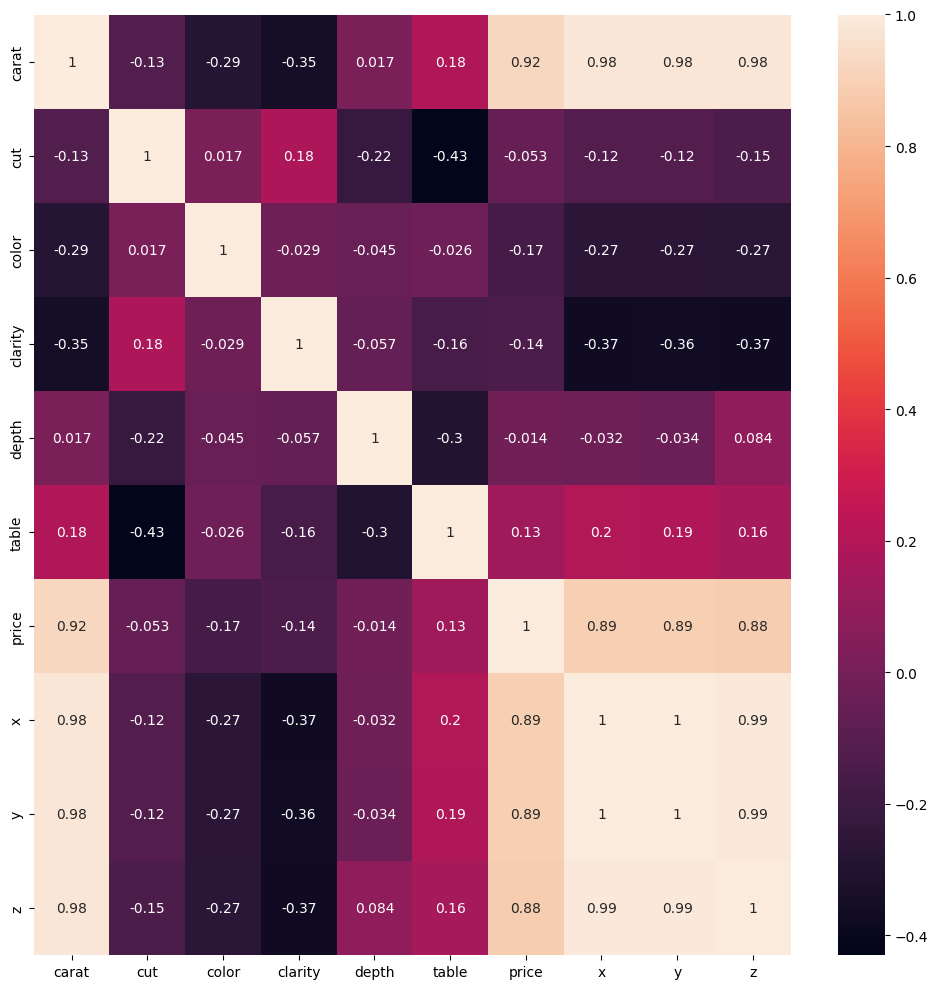

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True)

### **5. Data Preparation**

**a) Do the final feature selection and extract them into Column X and the class label into Column into Y**

In [24]:
# Feature Selection
x = data.drop('price', axis = 1)
y = data['price']

In [25]:
x.shape, y.shape

((53319, 9), (53319,))

**b) Split the dataset into training and test sets**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 17)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((42655, 9), (10664, 9), (42655,), (10664,))